# Credit Card Spending Analysis


### 1. importing data

In [6]:
#Downloading packages
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [7]:
#importing packages

import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
#Locate the CSV file and load

os.chdir("../SpendingAnalysis/")
df1 = pd.read_csv("2021BA.csv")
df2 = pd.read_csv("2022BA.csv")
df3 = pd.read_csv("2022P.csv")
df = pd.concat([df1, df2, df3], axis=0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 856 entries, 0 to 306
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         856 non-null    object 
 1   Description  856 non-null    object 
 2   Amount       856 non-null    float64
dtypes: float64(1), object(2)
memory usage: 26.8+ KB


We have 856 rows

In [10]:
df

,Date,Description,Amount
0,30/12/2021,ASDA STORES FELTHAM,13.26
1,29/12/2021,TESCO STORE 2532 2532TE FELTHAM,1.81
2,29/12/2021,TESCO STORE 2532 2532TE FELTHAM,16.84
3,25/12/2021,IZ *GNDJ LIMITED FELTHAM,5.19
4,23/12/2021,IZ *LITTLE KATHMANDU EDGWARE,5.00
...,...,...,...
302,03/04/2022,IHS169516352PA02 2022-0 IMM HEALTH SURC,1248.00
303,02/04/2022,ASDA STORES FELTHAM,6.99
304,29/03/2022,LIDL LON FELTHAM 0058 FELTHAM,21.65
305,26/03/2022,TFL TRAVEL CHARGE TFL.GOV.UK/CP,7.20


We are only going to take the spending and remove the credit card bill paid.
Now its filtered to 796 rows

In [11]:
df = df[df['Amount']>0]
df

,Date,Description,Amount
0,30/12/2021,ASDA STORES FELTHAM,13.26
1,29/12/2021,TESCO STORE 2532 2532TE FELTHAM,1.81
2,29/12/2021,TESCO STORE 2532 2532TE FELTHAM,16.84
3,25/12/2021,IZ *GNDJ LIMITED FELTHAM,5.19
4,23/12/2021,IZ *LITTLE KATHMANDU EDGWARE,5.00
...,...,...,...
302,03/04/2022,IHS169516352PA02 2022-0 IMM HEALTH SURC,1248.00
303,02/04/2022,ASDA STORES FELTHAM,6.99
304,29/03/2022,LIDL LON FELTHAM 0058 FELTHAM,21.65
305,26/03/2022,TFL TRAVEL CHARGE TFL.GOV.UK/CP,7.20


### 2. Extracting the location Keyword from the description

In [12]:
!pip install requests

In [13]:
#Getting the cities keyword from a url and setting as a list

import requests
import json

cities_url = "https://raw.githubusercontent.com/russ666/all-countries-and-cities-json/6ee538beca8914133259b401ba47a550313e8984/countries.json"
cities_json = json.loads(requests.get(cities_url).content.decode('utf8'))

cities = set(cities_json.get('United Kingdom', []))


In [14]:
print(cities)

{'Temple', 'Westgate', 'Bromham', 'Studley', 'Hanley', 'Hanworth', 'Bidford-on-Avon', 'Doagh', 'Saxtead', 'Lisburn', 'Tile Hill', 'Murton', 'Henfield', 'Rosslea', 'Rivington', 'Greensted', 'Ullesthorpe', 'Gaydon', 'Gosfield', 'Porth', 'Sandycroft', 'Cowdenbeath', 'Wilmington', 'Winterborne Kingston', 'Westbury-sub-Mendip', 'Hemsworth', 'Whickham', 'Ashton-under-Lyne', 'Barley', 'Westcott', 'Maida Vale', 'Long Stratton', 'Bracknell', 'East Leake', 'Hailsham', 'Shireoaks', 'Faulkland', 'Tackley', 'Garston', 'Blunham', 'Invergordon', 'Askham', 'Minsterley', 'Itchen', 'Chorley', 'Wrington', 'Sandown', 'Kirkby in Ashfield', 'Ottershaw', 'Betchworth', 'Laxton', 'Oakamoor', 'Withernwick', 'Bilston', 'Millbrook', 'Stoke Climsland', 'Appley Bridge', 'Askern', 'Great Amwell', 'Sanderstead', 'West Ashby', 'Burton Pidsea', 'Walton on the Hill', 'Binsted', 'Lidlington', 'Elderslie', 'Aberdeen', 'Bembridge', 'Wadebridge', 'Codsall', 'Shepshed', 'Great Barton', 'Halesowen', 'Cranfield', 'Rothesay', '

2.1. __Parsing the location keyword using flashtext__

In [15]:
!pip install flashtext

In [16]:

from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor(case_sensitive=False)
keyword_processor.add_keywords_from_list(sorted(cities))


In [17]:
texts = '33CPAYMENT*PRET A MANGER LONDON'
keyword_processor.extract_keywords(texts)

['London']

In [18]:
#applying the parsed keyword to a new column called 'Location'. Alternatively filling the field as UK where we could not parse cities

df['Location'] = df['Description'].apply(keyword_processor.extract_keywords).str[0].fillna('UK')


/var/folders/3s/ctxnws1d7z96jkwxt5d58_600000gn/T/ipykernel_47268/3793971628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Description'].apply(keyword_processor.extract_keywords).str[0].fillna('UK')


In [19]:
#Removing the brackets

df['Location'] = df['Location'].str.replace('[', '').str.replace(']', '')

/var/folders/3s/ctxnws1d7z96jkwxt5d58_600000gn/T/ipykernel_47268/1995752333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Location'].str.replace('[', '').str.replace(']', '')


In [20]:
df['Location']

0      Feltham
1      Feltham
2      Feltham
3      Feltham
4      Edgware
        ...   
302         UK
303    Feltham
304    Feltham
305         UK
306         UK
Name: Location, Length: 796, dtype: object

In [21]:
df

,Date,Description,Amount,Location
0,30/12/2021,ASDA STORES FELTHAM,13.26,Feltham
1,29/12/2021,TESCO STORE 2532 2532TE FELTHAM,1.81,Feltham
2,29/12/2021,TESCO STORE 2532 2532TE FELTHAM,16.84,Feltham
3,25/12/2021,IZ *GNDJ LIMITED FELTHAM,5.19,Feltham
4,23/12/2021,IZ *LITTLE KATHMANDU EDGWARE,5.00,Edgware
...,...,...,...,...
302,03/04/2022,IHS169516352PA02 2022-0 IMM HEALTH SURC,1248.00,UK
303,02/04/2022,ASDA STORES FELTHAM,6.99,Feltham
304,29/03/2022,LIDL LON FELTHAM 0058 FELTHAM,21.65,Feltham
305,26/03/2022,TFL TRAVEL CHARGE TFL.GOV.UK/CP,7.20,UK


### 3. Extracting the retail keyword using Flashtext

In [22]:
#Adding some UK retails to the keyword

retailList = ['Asda','HUTCHISON','Tesco','Pret','Costa','Cineworld','DELIVEROO','Uber','Dayfresh','AMZNMKTPLACE','Starbucks','MCDONALD\'S','SAINSBURY\'s','Marks And Spencer','WETHERSPOON','READING BUSES','Sports Direct','Wikimedia','Trainline','Poundland','TK MAXX','Primark','Tim Hortons','Qatar Airways','Emirates','Boots','TFL','Lidl','Co-OP','Specsavers','Apple']

In [23]:
keyword_processor = KeywordProcessor(case_sensitive=False)
keyword_processor.add_keywords_from_list(retailList)



In [24]:

texts = '33CPAYMENT*PRET A MANGER LONDON'
keyword_processor.extract_keywords(texts)

['Pret']

In [25]:
#applying the parsed keyword to a new column called 'Retail'. Alternatively filling the field as Other where we could not parse retail

df['Retail'] = df['Description'].apply(keyword_processor.extract_keywords).str[0].fillna('Other')


/var/folders/3s/ctxnws1d7z96jkwxt5d58_600000gn/T/ipykernel_47268/262173179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Retail'] = df['Description'].apply(keyword_processor.extract_keywords).str[0].fillna('Other')


In [26]:
#Adjusting Case

df['Retail'] = df['Retail'].str.title()


/var/folders/3s/ctxnws1d7z96jkwxt5d58_600000gn/T/ipykernel_47268/630286309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Retail'] = df['Retail'].str.title()


### 4. Analysis

In [27]:
#Changing date type

df['Date'] = pd.to_datetime(df['Date'])

/var/folders/3s/ctxnws1d7z96jkwxt5d58_600000gn/T/ipykernel_47268/3917982925.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
/var/folders/3s/ctxnws1d7z96jkwxt5d58_600000gn/T/ipykernel_47268/3917982925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [28]:
df.describe()

,Date,Amount
count,796,796.000000
mean,2022-05-05 20:28:20.502512384,16.175967
min,2021-10-02 00:00:00,0.200000
25%,2022-02-15 00:00:00,3.737500
50%,2022-04-25 00:00:00,5.850000
75%,2022-08-04 00:00:00,11.000000
max,2022-12-30 00:00:00,1248.000000
std,NaN,69.732442


In [29]:
print(df['Date'].max()-df['Date'].min())
print(len(df['Date'].unique()))
print(df['Amount'].sum())
print(df['Amount'].sum()/int((df['Date'].max()-df['Date'].min()).days))

454 days 00:00:00
336
12876.07
28.361387665198237


__*4.1. Findings*__
___________
1. The data contains around __*15 months*__  or __*454 days*__ of spendings 
2. Total amount of money spent in duration on the credit card was £*12876.07*
3. Out of __*454 days*__. There was __*336 days*__ where the money was spent
4. Average amount spent each day was *__28.36__*

__4.2. Top 5 most visited Retail__

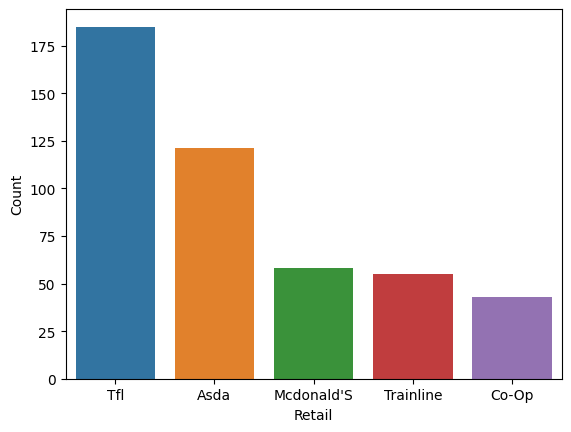

In [30]:
counts = df['Retail'].value_counts()
top5Frequent = pd.DataFrame({'Retail': counts[counts.index!='Other'].index[:5],
                          'Count': counts[counts.index!='Other'].values[:5]})
sns.barplot(data=top5Frequent,x='Retail',y='Count')
plt.show()

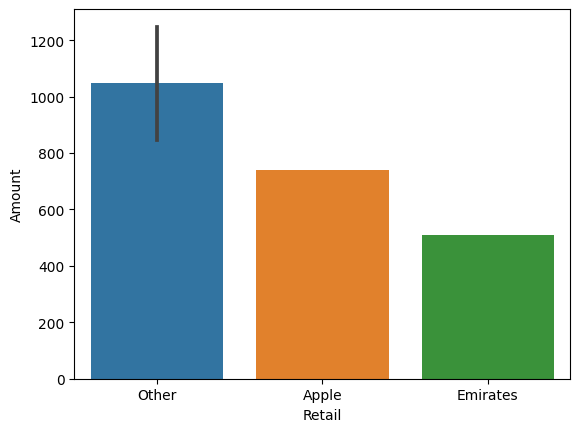

In [31]:
sns.barplot(data=df.sort_values('Amount', ascending=False).head(5),x='Retail',y='Amount')
plt.show()